In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [122]:
data =  pd.read_csv("open-meteo-dataset.csv")
data.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,wind_direction_100m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,2020-01-01T00:00,6.4,93.0,5.4,4.3,0.0,0.0,0.0,0.0,3.0,...,101.0,16.2,6.6,7.1,8.3,10.0,0.377,0.381,0.412,0.414
1,2020-01-01T01:00,6.7,93.0,5.6,4.7,0.0,0.0,0.0,0.0,3.0,...,100.0,12.2,6.5,7.1,8.3,9.9,0.376,0.381,0.412,0.414
2,2020-01-01T02:00,7.2,93.0,6.2,5.5,0.0,0.0,0.0,0.0,3.0,...,126.0,11.9,6.6,7.0,8.3,9.9,0.376,0.381,0.412,0.414
3,2020-01-01T03:00,8.0,96.0,7.4,6.3,0.0,0.0,0.0,0.0,3.0,...,144.0,11.2,6.8,7.1,8.3,9.9,0.376,0.381,0.412,0.414
4,2020-01-01T04:00,8.2,96.0,7.6,6.6,0.0,0.0,0.0,0.0,3.0,...,142.0,13.0,7.0,7.1,8.3,9.9,0.376,0.380,0.412,0.414


In [2]:
raw_data = pd.read_csv("Exeter-data.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3786 non-null   object 
 1   datetime          3786 non-null   object 
 2   tempmax           3786 non-null   float64
 3   tempmin           3786 non-null   float64
 4   temp              3786 non-null   float64
 5   feelslikemax      3786 non-null   float64
 6   feelslikemin      3786 non-null   float64
 7   feelslike         3786 non-null   float64
 8   dew               3786 non-null   float64
 9   humidity          3786 non-null   float64
 10  precip            3786 non-null   float64
 11  precipprob        3786 non-null   int64  
 12  precipcover       3786 non-null   float64
 13  preciptype        3100 non-null   object 
 14  snow              3632 non-null   float64
 15  snowdepth         3632 non-null   float64
 16  windgust          3721 non-null   float64


In [3]:
weather_data =  raw_data[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover','preciptype','snow','snowdepth','windgust','windspeed','winddir','sealevelpressure','cloudcover','conditions','description']]
weather_data.head()

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,conditions,description
0,19.3,11.5,15.5,11.2,76.6,0.000,0,0.00,NaN,NaN,NaN,46.4,19.7,93.8,1018.5,65.9,Partially cloudy,Partly cloudy throughout the day.
1,20.5,10.4,15.8,9.8,69.2,0.000,0,0.00,NaN,NaN,NaN,NaN,17.8,181.8,1022.8,34.4,Partially cloudy,Partly cloudy throughout the day.
2,21.5,11.6,16.5,12.1,75.9,0.000,0,0.00,NaN,NaN,NaN,48.2,20.8,225.9,1019.9,56.7,Partially cloudy,Partly cloudy throughout the day.
3,17.5,14.8,15.8,14.5,92.1,3.209,100,8.33,rain,NaN,NaN,61.2,27.0,202.0,1007.5,81.9,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
4,18.8,11.6,15.6,12.3,82.1,7.769,100,12.50,rain,NaN,NaN,NaN,20.2,254.5,1002.1,68.7,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...


In [4]:
weather_data.describe()

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover
count,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3632.000000,3632.000000,3721.000000,3786.000000,3786.000000,3786.000000,3786.000000
mean,13.589276,7.559218,10.503434,7.893661,85.016429,2.941866,80.190174,16.254340,0.005094,0.066134,42.573314,23.414950,203.445668,1015.505124,66.759773
std,5.195068,4.419903,4.590504,4.456504,8.611530,4.862767,39.861925,20.651427,0.100502,0.859799,15.624031,8.761196,93.106166,10.711903,21.586985
min,-2.300000,-6.600000,-4.800000,-8.900000,44.300000,0.000000,0.000000,0.000000,0.000000,0.000000,9.700000,5.400000,0.400000,967.500000,0.000000
25%,9.700000,4.200000,7.200000,4.800000,79.900000,0.041000,100.000000,4.170000,0.000000,0.000000,30.600000,16.900000,134.550000,1009.400000,53.600000
50%,13.300000,7.800000,10.500000,8.250000,86.300000,0.642500,100.000000,12.500000,0.000000,0.000000,40.900000,22.100000,224.100000,1016.600000,69.400000
75%,17.500000,11.100000,14.200000,11.300000,91.700000,3.737500,100.000000,16.670000,0.000000,0.000000,53.600000,28.500000,273.200000,1022.700000,84.000000
max,30.600000,19.200000,23.700000,18.200000,99.500000,39.409000,100.000000,100.000000,3.300000,28.100000,116.200000,68.600000,359.500000,1048.400000,100.000000


In [5]:
weather_data.isnull().sum()

tempmax               0
tempmin               0
temp                  0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          686
snow                154
snowdepth           154
windgust             65
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
conditions            0
description           0
dtype: int64

In [6]:
weather_data['preciptype'].unique()

array([nan, 'rain', 'rain,snow', 'snow'], dtype=object)

In [13]:
weather_data['windgust'].unique()

array([ 46.4,   nan,  48.2,  61.2,  35.3,  68.4,  55.4,  47.8,  57.6,
        59.4,  64.5,  58.1,  39.3,  38.9,  50.3,  53.6,  42.5,  51.8,
        31.7,  64.8,  50. ,  54.4,  33.5,  40.7,  57.4,  69.8,  72. ,
        62.3,  74.9,  58.8,  54.3,  55.5,  64.2,  62.4,  59.2,  49.1,
        62.9,  83.5,  66.6,  65.3,  88. ,  44.6,  45.9,  26.3,  29.9,
        56.6,  64. ,  68.2,  73.9,  67.8,  23.4,  54.9,  65.7,  66. ,
        55.1,  61.4,  58.4,  56.4,  75.5,  70.4,  17.6,  19.1,  65.9,
        63.6,  27. ,  62.6,  59.9,  79.4,  78.8,  68.5,  74. ,  67.5,
        83.8,  83.9,  34.6,  30.6,  22.7,  55. ,  81.5,  73.6,  75.6,
        62.7,  25.2,  60.7,  23.8,  32. ,  37.1,  24.5,  38.5,  39.6,
        61.3,  67.1,  69. ,  71.9,  57.8,  66.3,  68.8,  34.2,  40. ,
        55.2,  60.3,  41. ,  28.1,  58.5,  27.4,  63.4,  86.2,  72.4,
        88.7,  58.9,  56.9,  29.2,  27.7,  36.4,  31.3,  57.3,  35.6,
        30.2,  53. ,  74.2,  45.4,  63. ,  74.4,  70.9,  55.6,  51.9,
        76. ,  74.6,

In [7]:
data_df = weather_data[weather_data['preciptype'].isna()]

In [8]:
data_df['precipprob'].unique()

array([0], dtype=int64)

In [9]:
pd.options.mode.copy_on_write = True 
new_data = weather_data.copy()
new_data['preciptype']=new_data['preciptype'].fillna('no rain')

In [15]:
new_data['snow']=new_data['snow'].fillna(0)
new_data['snowdepth']=new_data['snowdepth'].fillna(0)
wind_gust_mean = new_data['windgust'].mean()
wind_gust_mean
new_data['windgust']=new_data['windgust'].fillna(wind_gust_mean)

In [16]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           3786 non-null   float64
 1   tempmin           3786 non-null   float64
 2   temp              3786 non-null   float64
 3   dew               3786 non-null   float64
 4   humidity          3786 non-null   float64
 5   precip            3786 non-null   float64
 6   precipprob        3786 non-null   int64  
 7   precipcover       3786 non-null   float64
 8   preciptype        3786 non-null   object 
 9   snow              3786 non-null   float64
 10  snowdepth         3786 non-null   float64
 11  windgust          3786 non-null   float64
 12  windspeed         3786 non-null   float64
 13  winddir           3786 non-null   float64
 14  sealevelpressure  3786 non-null   float64
 15  cloudcover        3786 non-null   float64
 16  conditions        3786 non-null   object 


In [13]:
new_data['preciptype'].unique()

array(['rain', 'rain,snow', 'no rain'], dtype=object)

In [14]:
new_data['precipprob'].unique()

array([100,   0], dtype=int64)

In [15]:
new_data['precip'].unique()

array([7.0500e+00, 7.7300e+00, 5.4490e+00, 1.3960e+00, 3.2000e-02,
       5.3200e-01, 0.0000e+00, 4.7400e-01, 2.4640e+00, 1.9270e+00,
       1.5349e+01, 7.5730e+00, 7.7910e+00, 6.9700e-01, 4.1870e+00,
       1.1700e-01, 1.8100e-01, 2.4980e+00, 1.5000e-02, 1.1000e-02,
       3.7220e+00, 2.1100e-01, 5.9890e+00, 1.0189e+01, 2.3760e+00,
       3.3800e-01, 2.3600e-01, 3.0420e+00, 1.4390e+00, 1.2700e-01,
       4.1000e-02, 1.1600e-01, 1.0200e-01, 6.1100e-01, 3.0600e-01,
       1.9200e+00, 4.9700e-01, 5.7620e+00, 9.5600e-01, 9.1900e-01,
       1.2800e-01, 8.4000e-02, 5.1500e-01, 5.3000e-02, 1.7650e+00,
       1.0640e+01, 2.7800e-01, 9.8510e+00, 2.7230e+00, 4.5020e+00,
       3.0280e+00, 1.7490e+00, 3.6620e+00, 6.2000e+00, 2.6800e+00,
       3.5770e+00, 8.4900e-01, 1.6300e+00, 2.6070e+00, 1.5160e+00,
       1.2340e+00, 1.5900e-01, 5.2840e+00, 5.2480e+00, 2.8200e-01,
       9.5500e-01, 3.9700e+00, 1.1620e+00, 2.9900e-01, 4.2400e-01,
       8.1000e+00, 4.9960e+00, 1.1400e+00, 1.0600e-01, 1.9370e

In [17]:
new_data.head()

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,conditions,description
0,19.3,11.5,15.5,11.2,76.6,0.000,0,0.00,no rain,0.0,0.0,46.400000,19.7,93.8,1018.5,65.9,Partially cloudy,Partly cloudy throughout the day.
1,20.5,10.4,15.8,9.8,69.2,0.000,0,0.00,no rain,0.0,0.0,42.573314,17.8,181.8,1022.8,34.4,Partially cloudy,Partly cloudy throughout the day.
2,21.5,11.6,16.5,12.1,75.9,0.000,0,0.00,no rain,0.0,0.0,48.200000,20.8,225.9,1019.9,56.7,Partially cloudy,Partly cloudy throughout the day.
3,17.5,14.8,15.8,14.5,92.1,3.209,100,8.33,rain,0.0,0.0,61.200000,27.0,202.0,1007.5,81.9,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
4,18.8,11.6,15.6,12.3,82.1,7.769,100,12.50,rain,0.0,0.0,42.573314,20.2,254.5,1002.1,68.7,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...


In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [85]:
# Temperature & precip correlation
x_str='tempmax,tempmin,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover'
x = new_data[list(x_str.split(','))]
y = new_data['precip']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train,y_train)
print('Slope:', lin_reg1.coef_)
print('Intercept:', lin_reg1.intercept_)

Slope: [ 0.19103889 -0.0348291  -0.12052176  0.19607734  0.13376664 -0.00047031
 -0.17458826  0.00221032]
Intercept: 159.08302442297565


In [86]:
y_pred = lin_reg1.predict(X_test)
weather_test = X_test.copy()
weather_test['precip'] = y_test

weather_test['predicted_precip'] = y_pred
#new_data['predicted_precip'] = y_pred
score = r2_score(weather_test['precip'],weather_test['predicted_precip'])
mae = mean_absolute_error(weather_test['precip'],weather_test['predicted_precip'])
mse = np.sqrt(mean_absolute_error(weather_test['precip'],weather_test['predicted_precip']))
#acc = accuracy_score(new_data['precip'],new_data['predicted_precip'])
print(f"The accuracy of our model is {score},{mae},{mse}")

The accuracy of our model is 0.40219105775813246,2.3833562978640246,1.5438122612105478


In [87]:
# Temperature & precip correlation
x_str='tempmax,tempmin,dew,humidity,windspeed,sealevelpressure,cloudcover'
x = new_data[list(x_str.split(','))]
y = new_data['precip']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
lin_reg1 = Ridge(alpha=3.0)
lin_reg1.fit(X_train,y_train)
print('Slope:', lin_reg1.coef_)
print('Intercept:', lin_reg1.intercept_)


Slope: [ 0.25958909  0.01878251 -0.2410787   0.22152839  0.13842517 -0.17218771
  0.00728636]
Intercept: 153.48131066958183


- R2 = 1: Perfect fit. The model explains all the variability in the target variable.
- R2 = 0: The model does not explain any variability in the target variable.
- 0 < R2 < 1: The model explains a proportion of the variability in the target variable.
- A higher R2 score indicates a better fit

- The MAE value itself indicates the average absolute error between predicted and actual values. The smaller the MAE, the better the model’s predictions align with the actual data. A MAE of 0 would mean a perfect prediction, but in most cases, achieving such perfection is unlikely.

- MSE Squaring the differences eliminates negative values for the differences and ensures that the mean squared error is always greater than or equal to zero. It is almost always a positive value. Only a perfect model with no error produces an MSE of zero. And that doesn’t occur in practice.

- Additionally, squaring increases the impact of larger errors. These calculations disproportionately penalize larger errors more than smaller errors. This property is essential when you want your model to have smaller errors.

In [88]:
y_pred = lin_reg1.predict(X_test)
weather_test = X_test.copy()
weather_test['precip'] = y_test

weather_test['predicted_precip'] = y_pred
#new_data['predicted_precip'] = y_pred
score = r2_score(weather_test['precip'],weather_test['predicted_precip'])
mae = mean_absolute_error(weather_test['precip'],weather_test['predicted_precip'])
mse = np.sqrt(mean_absolute_error(weather_test['precip'],weather_test['predicted_precip']))
#acc = accuracy_score(new_data['precip'],new_data['predicted_precip'])
print(f"The accuracy of our model is {score},{mae},{mse}")
#The accuracy of our model is 0.0031452574862941285,3.7875190906781353,1.9461549503259332
#The accuracy of our model is -0.003421286385521416,3.5726120091258107,1.8901354472962542

The accuracy of our model is 0.4011016126726362,2.4160112199639983,1.5543523474309158


In [20]:
new_data[['precip','predicted_precip']]

KeyError: "['predicted_precip'] not in index"

KeyError: 'predicted_precip'

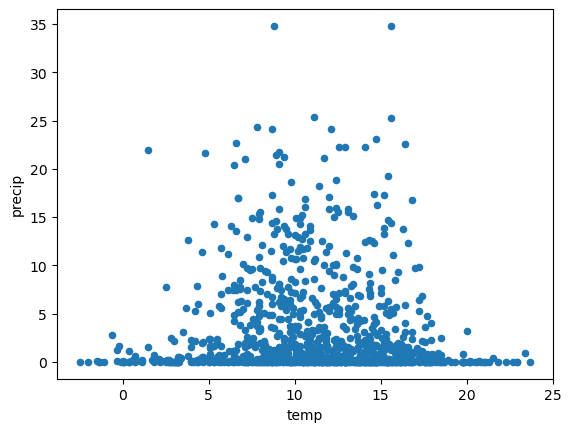

In [21]:
ax = new_data.plot.scatter(x='temp', y='precip')
ax = new_data.plot.line(x='temp', y='predicted_precip', ax=ax, c='red')
#ax.set_ylim(-1,6)

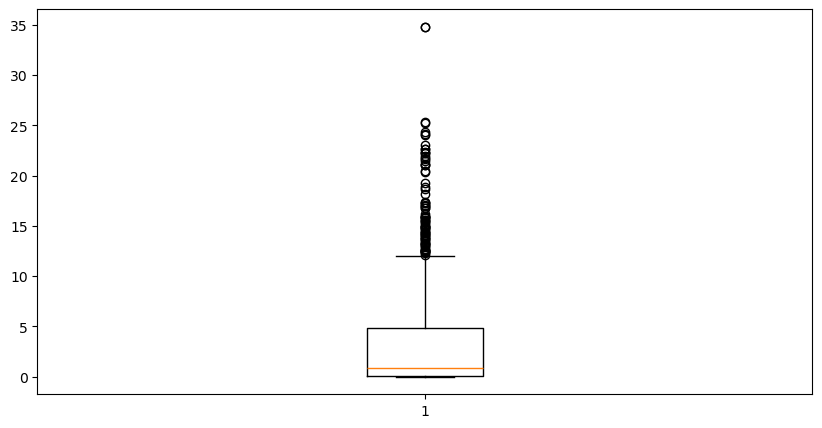

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(new_data['precip'])
plt.show()

In [ ]:
feature_list = []

In [ ]:

def find_features(x,y,x_str,y_str):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    result = {}
    result['x_columns'] = x_str
    result['x_count'] = len(list(x_str.split(',')))
    result['y_columns'] = y_str
    result['y_count']=len(list(y_str.split(',')))
    result['Slope'] = lin_reg1.coef_[0]
    result['Intercept'] = lin_reg1.intercept_
    y_pred = lin_reg.predict(X_test)
    weather_test = X_test.copy()
    weather_test['precip'] = y_test
    weather_test['predicted_precip'] = y_pred
    score = r2_score(weather_test['precip'],weather_test['predicted_precip'])
    mae = mean_absolute_error(weather_test['precip'],weather_test['predicted_precip'])
    mse = np.sqrt(mean_absolute_error(weather_test['precip'],weather_test['predicted_precip']))
    result['score'] = score
    result['mae'] = mae
    result['mse'] = mse
    feature_list.append(result)


'tempmax','tempmin','temp','dew','humidity',
'precip','precipprob','precipcover','preciptype',
'snow','snowdepth','windgust','windspeed','winddir',
'sealevelpressure','cloudcover','conditions','description'

In [ ]:
def find_combined_features(combined_list, target):
    for value in combined_list:
        if type(value) == tuple:
            new_feature_list = list(value)
            feature_str = ','.join(new_feature_list)
            target_str = target
            x = new_data[new_feature_list]
            y = new_data[target]
            find_features(x,y,feature_str,target_str)    
        else:      
            x = new_data[[value]]
            y = new_data[target]
            find_features(x,y,value,target)


In [ ]:
features = ['temp','dew','humidity','windgust','windspeed','winddir','sealevelpressure','cloudcover']
import itertools
two_combinations = list(itertools.combinations(features, 2))
three_combinations = list(itertools.combinations(features, 3))
four_combinations = list(itertools.combinations(features, 4))
five_combinations = list(itertools.combinations(features, 5))
six_combinations = list(itertools.combinations(features, 6))
seven_combinations = list(itertools.combinations(features, 7))
eight_combinations = list(itertools.combinations(features, 8))

In [ ]:
target = 'precip'
find_combined_features(features,target)
find_combined_features(two_combinations,target)
find_combined_features(three_combinations,target)
find_combined_features(four_combinations,target)
find_combined_features(five_combinations,target)
find_combined_features(six_combinations,target)
find_combined_features(seven_combinations,target)
find_combined_features(eight_combinations,target)

In [ ]:
len(feature_list)

255

In [ ]:
featu_acc_df = pd.DataFrame(feature_list)
featu_acc_df

,x_columns,x_count,y_columns,y_count,Slope,Intercept,score,mae,mse
0,temp,1,precip,1,-0.059618,4.131293,0.005090,3.834163,1.958102
1,dew,1,precip,1,-0.059618,4.131293,0.012890,3.675321,1.917113
2,humidity,1,precip,1,-0.059618,4.131293,0.163923,3.392502,1.841875
3,windgust,1,precip,1,-0.059618,4.131293,0.130521,3.125712,1.767968
4,windspeed,1,precip,1,-0.059618,4.131293,0.200807,3.115487,1.765074
...,...,...,...,...,...,...,...,...,...
250,"temp,dew,humidity,windspeed,winddir,sealevelpr...",7,precip,1,-0.059618,4.131293,0.467827,2.621183,1.619007
251,"temp,dew,windgust,windspeed,winddir,sealevelpr...",7,precip,1,-0.059618,4.131293,0.496871,2.620588,1.618823
252,"temp,humidity,windgust,windspeed,winddir,seale...",7,precip,1,-0.059618,4.131293,0.458411,2.662626,1.631755
253,"dew,humidity,windgust,windspeed,winddir,sealev...",7,precip,1,-0.059618,4.131293,0.431488,2.562438,1.600762


In [ ]:
pd.options.display.max_colwidth = 100
sorted_df = featu_acc_df.sort_values(by=['score'], ascending=False)
top_10 = sorted_df.head(30)
features_greater_5 = top_10[top_10['x_count']>4]
features_greater_5

In [ ]:
sorted_df = featu_acc_df.sort_values(by=['score'], ascending=False)
top_10 = sorted_df.head(30)
features_greater_5 = top_10[top_10['x_count']>4]
features_greater_5


,x_columns,x_count,y_columns,y_count,Slope,Intercept,score,mae,mse
205,"dew,humidity,windspeed,sealevelpressure,cloudcover",5,precip,1,-0.059618,4.131293,0.547341,2.298509,1.516084
249,"temp,dew,humidity,windgust,winddir,sealevelpressure,cloudcover",7,precip,1,-0.059618,4.131293,0.535742,2.502835,1.582035
226,"temp,dew,humidity,windspeed,sealevelpressure,cloudcover",6,precip,1,-0.059618,4.131293,0.515076,2.628250,1.621188
246,"temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure",7,precip,1,-0.059618,4.131293,0.501109,2.507802,1.583604
164,"temp,dew,humidity,windgust,sealevelpressure",5,precip,1,-0.059618,4.131293,0.498922,2.416466,1.554498
251,"temp,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover",7,precip,1,-0.059618,4.131293,0.496871,2.620588,1.618823
223,"temp,dew,humidity,windgust,sealevelpressure,cloudcover",6,precip,1,-0.059618,4.131293,0.494979,2.629514,1.621578
254,"temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover",8,precip,1,-0.059618,4.131293,0.492434,2.443112,1.563046
224,"temp,dew,humidity,windspeed,winddir,sealevelpressure",6,precip,1,-0.059618,4.131293,0.492345,2.511915,1.584902
248,"temp,dew,humidity,windgust,windspeed,sealevelpressure,cloudcover",7,precip,1,-0.059618,4.131293,0.488311,2.398651,1.548758


# multiple linear regression


In [89]:
from sklearn.linear_model import LinearRegression
multiple_linear_reg = LinearRegression(fit_intercept=False)
x_str='tempmin,tempmax,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover'
x = new_data[list(x_str.split(','))]
y = new_data['precip']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
multiple_linear_reg.fit(X_train,y_train)
#LinearRegression(copy_X=True,fit_intercept=False,n_jobs=None,normalize=False)

LinearRegression(fit_intercept=False)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
polynom_featu =PolynomialFeatures(degree=3)
x_train_poly = polynom_featu.fit_transform(X_train)
x_test_poly = polynom_featu.fit_transform(X_test)
polynomial_reg= LinearRegression(fit_intercept=False)
polynomial_reg.fit(x_train_poly,y_train)
#LinearRegression(copy_X=True,fit_intercept=False,n_jobs=None,normalize=False)

LinearRegression(fit_intercept=False)

In [29]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(max_depth=5,random_state=13)
decision_tree_regressor.fit(X_train,y_train)
#DecisionTreeRegressor(criterion='mse',max_depth=5,max_features=None,max_leaf_nodes=None,min_impurity_decrease=0.0,
#                      min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,presort= False,
#                      random_state=13,splitter='best')

DecisionTreeRegressor(max_depth=5, random_state=13)

In [30]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators=400,max_depth=5,random_state=13)
random_forest_reg.fit(X_train,y_train)
#RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=5,max_features='auto',max_leaf_nodes=None,
#                      min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,
#                      n_estimators=400,n_jobs=None,oob_score=False,random_state=13,verbose=0,warm_start=False)

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=13)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost_reg = GradientBoostingRegressor(n_estimators=3,max_depth=3,learning_rate=1,criterion='squared_error')
grad_boost_reg.fit(X_train,y_train)
#GradientBoostingRegressor(alpha=0.9,criterion='mse',init=None,learning_rate=1, loss='ls',max_depth=3,max_features=None,
#                          max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2,
#                          min_weight_fraction_leaf=0.0,n_estimators=3,n_iter_no_change=None,random_state=None,subsample=1.0,
#                          tol=0.0001,validation_fraction=0.1,verbose=0,warm_start=False
#                          )

GradientBoostingRegressor(criterion='squared_error', learning_rate=1,
                          n_estimators=3)

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt


In [90]:
y_pred_mlr_train = multiple_linear_reg.predict(X_train)
y_pred_mlr_test = multiple_linear_reg.predict(X_test)
accuracy_mlr_train = r2_score(y_train,y_pred_mlr_train)
accuracy_mlr_test = r2_score(y_test,y_pred_mlr_test)
rmse_mlr_train = sqrt(mean_squared_error(y_train,y_pred_mlr_train))
rmse_mlr_test = sqrt(mean_squared_error(y_test,y_pred_mlr_test))
y_pred_cv_mlr= cross_val_predict(multiple_linear_reg,x,y,cv=10)
accuracy=r2_score(y,y_pred_cv_mlr)
accuracy

0.33187788124727446

In [34]:
y_pred_pr_train = polynomial_reg.predict(X_train)
y_pred_pr_test = polynomial_reg.predict(X_test)
accuracy_pr_train = r2_score(y_train,y_pred_pr_train)
accuracy_pr_test = r2_score(y_test,y_pred_pr_test)
rmse_pr_train = sqrt(mean_squared_error(y_train,y_pred_pr_train))
rmse_pr_test = sqrt(mean_squared_error(y_test,y_pred_pr_test))
y_pred_cv_pr= cross_val_predict(polynomial_reg,x,y,cv=10)
accuracy=r2_score(y,y_pred_cv_pr)
accuracy

c:\Users\sneha\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 7 features, but LinearRegression is expecting 120 features as input.

In [35]:
y_pred_dt_train = decision_tree_regressor.predict(X_train)
y_pred_dt_test = decision_tree_regressor.predict(X_test)
accuracy_dt_train = r2_score(y_train,y_pred_dt_train)
accuracy_dt_test = r2_score(y_test,y_pred_dt_test)
rmse_dt_train = sqrt(mean_squared_error(y_train,y_pred_dt_train))
rmse_dt_test = sqrt(mean_squared_error(y_test,y_pred_dt_test))
y_pred_cv_dt= cross_val_predict(decision_tree_regressor,x,y,cv=10)
accuracy=r2_score(y,y_pred_cv_dt)
accuracy

0.4122445046563922

In [36]:
y_pred_rf_train = random_forest_reg.predict(X_train)
y_pred_rf_test = random_forest_reg.predict(X_test)
accuracy_rf_train = r2_score(y_train,y_pred_rf_train)
accuracy_rf_test = r2_score(y_test,y_pred_rf_test)
rmse_rf_train = sqrt(mean_squared_error(y_train,y_pred_rf_train))
rmse_rf_test = sqrt(mean_squared_error(y_test,y_pred_rf_test))
y_pred_cv_rf= cross_val_predict(random_forest_reg,x,y,cv=10)
accuracy=r2_score(y,y_pred_cv_rf)
accuracy

0.475172685310727

In [37]:
y_pred_gb_train = grad_boost_reg.predict(X_train)
y_pred_gb_test = grad_boost_reg.predict(X_test)
accuracy_gb_train = r2_score(y_train,y_pred_gb_train)
accuracy_gb_test = r2_score(y_test,y_pred_gb_test)
rmse_gb_train = sqrt(mean_squared_error(y_train,y_pred_gb_train))
rmse_gb_test = sqrt(mean_squared_error(y_test,y_pred_gb_test))
y_pred_cv_gb= cross_val_predict(grad_boost_reg,x,y,cv=10)
accuracy=r2_score(y,y_pred_cv_gb)
accuracy

0.39288747532611223

In [38]:
new_data.head()

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,conditions,description
0,19.3,11.5,15.5,11.2,76.6,0.000,0,0.00,no rain,0.0,0.0,46.400000,19.7,93.8,1018.5,65.9,Partially cloudy,Partly cloudy throughout the day.
1,20.5,10.4,15.8,9.8,69.2,0.000,0,0.00,no rain,0.0,0.0,42.573314,17.8,181.8,1022.8,34.4,Partially cloudy,Partly cloudy throughout the day.
2,21.5,11.6,16.5,12.1,75.9,0.000,0,0.00,no rain,0.0,0.0,48.200000,20.8,225.9,1019.9,56.7,Partially cloudy,Partly cloudy throughout the day.
3,17.5,14.8,15.8,14.5,92.1,3.209,100,8.33,rain,0.0,0.0,61.200000,27.0,202.0,1007.5,81.9,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
4,18.8,11.6,15.6,12.3,82.1,7.769,100,12.50,rain,0.0,0.0,42.573314,20.2,254.5,1002.1,68.7,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...


In [40]:
df_log_reg = new_data.copy()
df_log_reg

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,conditions,description
0,19.3,11.5,15.5,11.2,76.6,0.000,0,0.00,no rain,0.0,0.0,46.400000,19.7,93.8,1018.5,65.9,Partially cloudy,Partly cloudy throughout the day.
1,20.5,10.4,15.8,9.8,69.2,0.000,0,0.00,no rain,0.0,0.0,42.573314,17.8,181.8,1022.8,34.4,Partially cloudy,Partly cloudy throughout the day.
2,21.5,11.6,16.5,12.1,75.9,0.000,0,0.00,no rain,0.0,0.0,48.200000,20.8,225.9,1019.9,56.7,Partially cloudy,Partly cloudy throughout the day.
3,17.5,14.8,15.8,14.5,92.1,3.209,100,8.33,rain,0.0,0.0,61.200000,27.0,202.0,1007.5,81.9,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
4,18.8,11.6,15.6,12.3,82.1,7.769,100,12.50,rain,0.0,0.0,42.573314,20.2,254.5,1002.1,68.7,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,13.9,11.5,12.9,12.0,94.2,0.000,0,0.00,no rain,0.0,0.0,23.800000,16.6,105.4,1028.9,91.7,Overcast,Cloudy skies throughout the day.
3782,13.9,10.5,12.4,10.7,89.8,0.200,100,8.33,rain,0.0,0.0,40.300000,20.5,105.2,1027.9,91.2,"Rain, Overcast",Cloudy skies throughout the day with rain.
3783,12.9,8.9,10.8,9.0,89.1,0.700,100,29.17,rain,0.0,0.0,35.300000,19.2,68.3,1023.4,85.6,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...
3784,10.9,8.0,9.3,7.5,88.8,0.000,0,0.00,rain,0.0,0.0,14.000000,11.8,78.8,1023.5,92.2,Overcast,Cloudy skies throughout the day.


In [45]:
df_log_reg['precipprob'].unique()

array([  0, 100], dtype=int64)

In [91]:
df_log_reg[['tempmin','tempmax','dew','humidity','windspeed','windgust','winddir','sealevelpressure','cloudcover','precip','precipprob','snow','snowdepth']].std()

tempmin              4.419903
tempmax              5.195068
dew                  4.456504
humidity             8.611530
windspeed            8.761196
windgust            15.489294
winddir             93.106166
sealevelpressure    10.711903
cloudcover          21.586985
precip               4.862767
precipprob          39.861925
snow                 0.098442
snowdepth            0.842228
dtype: float64

In [92]:
X=df_log_reg[['humidity','windgust','windspeed','winddir','cloudcover','sealevelpressure']]
y = df_log_reg['precipprob']

In [97]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

c:\Users\sneha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 162,  158],
       [  74, 1121]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

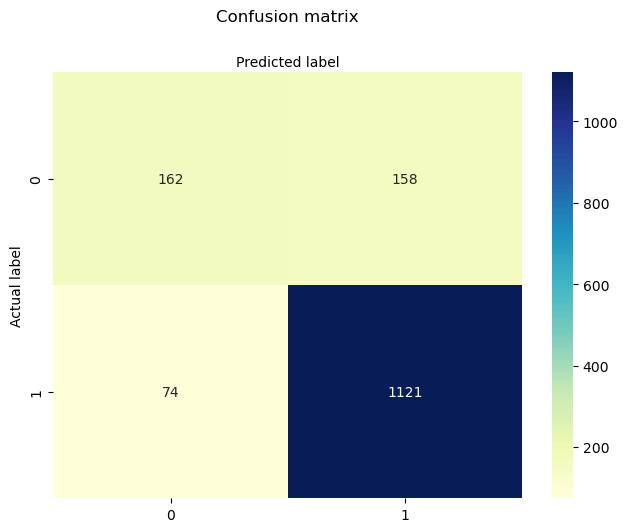

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [101]:
from sklearn.metrics import classification_report
target_names = ['no rain', 'rain']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     no rain       0.69      0.51      0.58       320
        rain       0.88      0.94      0.91      1195

    accuracy                           0.85      1515
   macro avg       0.78      0.72      0.74      1515
weighted avg       0.84      0.85      0.84      1515



In [102]:
score = logreg.score(X_test, y_test)
print(score)

0.8468646864686469


In [66]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [104]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8382838283828383


In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [105]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8495049504950495


In [72]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [80]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [107]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42
)

In [108]:
grad_class = GradientBoostingClassifier(random_state=42)

In [109]:
grad_class.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [110]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9366754617414248


In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
decision_tree_regressor = DecisionTreeRegressor(max_depth=5,random_state=13)
decision_tree_regressor.fit(X_train,y_train)
random_forest_reg = RandomForestClassifier(n_estimators=400,max_depth=5,random_state=13)
random_forest_reg.fit(X_train,y_train)
grad_boost_reg = GradientBoostingClassifier(n_estimators=3,max_depth=3,learning_rate=1,criterion='squared_error')
grad_boost_reg.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=1,
                           n_estimators=3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(max_depth=5,random_state=13)
decision_tree_regressor.fit(X_train,y_train)
y_pred_dt_train = decision_tree_regressor.predict(X_train)
y_pred_dt_test = decision_tree_regressor.predict(X_test)
accuracy_dt_train = r2_score(y_train,y_pred_dt_train)
accuracy_dt_test = r2_score(y_test,y_pred_dt_test)
rmse_dt_train = sqrt(mean_squared_error(y_train,y_pred_dt_train))
rmse_dt_test = sqrt(mean_squared_error(y_test,y_pred_dt_test))
y_pred_cv_dt= cross_val_predict(decision_tree_regressor,x,y,cv=10)
accuracy=r2_score(y,y_pred_cv_dt)
accuracy

0.33504166108940525

In [74]:
y_pred_rf_train = random_forest_reg.predict(X_train)
y_pred_rf_test = random_forest_reg.predict(X_test)
accuracy_rf_train = r2_score(y_train,y_pred_rf_train)
accuracy_rf_test = r2_score(y_test,y_pred_rf_test)
rmse_rf_train = sqrt(mean_squared_error(y_train,y_pred_rf_train))
rmse_rf_test = sqrt(mean_squared_error(y_test,y_pred_rf_test))
y_pred_cv_rf= cross_val_predict(random_forest_reg,x,y,cv=10)
accuracy=r2_score(y,y_pred_cv_rf)
accuracy

0.12707509881422918

In [75]:
y_pred_gb_train = grad_boost_reg.predict(X_train)
y_pred_gb_test = grad_boost_reg.predict(X_test)
accuracy_gb_train = r2_score(y_train,y_pred_gb_train)
accuracy_gb_test = r2_score(y_test,y_pred_gb_test)
rmse_gb_train = sqrt(mean_squared_error(y_train,y_pred_gb_train))
rmse_gb_test = sqrt(mean_squared_error(y_test,y_pred_gb_test))
y_pred_cv_gb= cross_val_predict(grad_boost_reg,x,y,cv=10)
accuracy=r2_score(y,y_pred_cv_gb)
accuracy

0.07553096179183127

In [ ]:
df_log_reg[(df_log_reg['preciptype'] == 'rain' & df_log_reg['preciptype'] =='rain,snow')]

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [120]:
df = df_log_reg['preciptype'] == 'no rain'
df.sum()

686

In [118]:
df_log_reg.shape

(3786, 18)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42672 entries, 0 to 42671
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                42672 non-null  object 
 1   temperature_2m (°C)                 42625 non-null  float64
 2   relative_humidity_2m (%)            42625 non-null  float64
 3   dew_point_2m (°C)                   42625 non-null  float64
 4   apparent_temperature (°C)           42625 non-null  float64
 5   precipitation (mm)                  42625 non-null  float64
 6   rain (mm)                           42625 non-null  float64
 7   snowfall (cm)                       42625 non-null  float64
 8   snow_depth (m)                      42048 non-null  float64
 9   weather_code (wmo code)             42625 non-null  float64
 10  pressure_msl (hPa)                  42625 non-null  float64
 11  surface_pressure (hPa)              42625

In [131]:
data['precipitation (mm)'].unique

<bound method Series.unique of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
42667    NaN
42668    NaN
42669    NaN
42670    NaN
42671    NaN
Name: precipitation (mm), Length: 42672, dtype: float64>